In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

# autooutlier

In [2]:
df = pd.read_csv("autodolu.csv")

In [3]:
data = df.copy

In [4]:
df.shape

(28630, 43)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   short_description        28630 non-null  object 
 1   make                     28630 non-null  object 
 2   model                    28630 non-null  object 
 3   location                 28630 non-null  object 
 4   price(€)                 28630 non-null  int64  
 5   body_type                28630 non-null  object 
 6   type                     28630 non-null  object 
 7   doors                    28630 non-null  float64
 8   country_version          28630 non-null  object 
 9   warranty                 28630 non-null  object 
 10  mileage                  28630 non-null  float64
 11  first_registration       28630 non-null  object 
 12  gearbox                  28630 non-null  object 
 13  fuel_type                28630 non-null  object 
 14  colour                

In [6]:
df.describe(exclude= "object").T

,count,mean,std,min,25%,50%,75%,max
price(€),28630.000,23555.202,25953.707,490.000,11990.000,17980.000,27990.000,1346900.000
doors,28630.000,4.140,1.212,1.000,3.000,5.000,5.000,6.000
mileage,28630.000,72624.771,67628.347,0.000,20290.000,57491.500,106667.500,1440000.000
seats,28630.000,4.704,0.807,0.000,4.000,5.000,5.000,17.000
power,28630.000,119.605,68.520,1.000,80.000,100.000,136.000,924.000
gears,28630.000,6.014,0.886,5.000,5.000,6.000,6.000,8.000
cylinders,28630.000,4.050,0.815,0.000,4.000,4.000,4.000,26.000
fuel_consumption,28630.000,5.694,2.805,0.000,4.400,5.200,6.600,99.900
age,28630.000,7.394,8.786,-180.000,2.000,5.000,9.000,123.000


In [8]:
# Calculating of limits
def limits(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    print("Lower Limit:",lower_lim) 
    print("Upper limit:", upper_lim)

In [9]:
# Counting of Outliers
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    return ((df[column]<lower_lim) | (df[column]>upper_lim)).sum()
    

In [10]:
# Dropping of Outliers
def dropping_of_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    return df[column].loc[~((df[column]<lower_lim) | (df[column]>upper_lim))]


In [11]:
#Explore different quantiles at the upper end
def winsorize_percentage_selection(df,column):
    print('90% quantile:   ', df[column].quantile(0.90))      
    print('92.5% quantile: ', df[column].quantile(0.925))      
    print('95% quantile:   ', df[column].quantile(0.95))       
    print('97.5% quantile: ', df[column].quantile(0.975))      
    print('99% quantile:   ', df[column].quantile(0.99))       
    print('99.9% quantile: ', df[column].quantile(0.999))

## price 

In [25]:
df.price

0        16950
1        80900
2        69900
3        46990
4        16800
         ...  
28625    37600
28626     5499
28627     7300
28628    29900
28629     4440
Name: price, Length: 28630, dtype: int64

In [18]:
df['price']=df["price(€)"]

In [12]:
df["price(€)"].count()

28630

In [13]:
df["price(€)"].describe()

count     28630.000
mean      23555.202
std       25953.707
min         490.000
25%       11990.000
50%       17980.000
75%       27990.000
max     1346900.000
Name: price(€), dtype: float64

In [14]:
df["price(€)"].sort_values(ascending=True).head(10)

5847     490
5513     500
19565    500
17516    590
5291     600
5351     600
5296     699
23792    700
3375     700
5519     740
Name: price(€), dtype: int64

In [15]:
limits(df,"price(€)")

Lower Limit: -12010.0
Upper limit: 51990.0


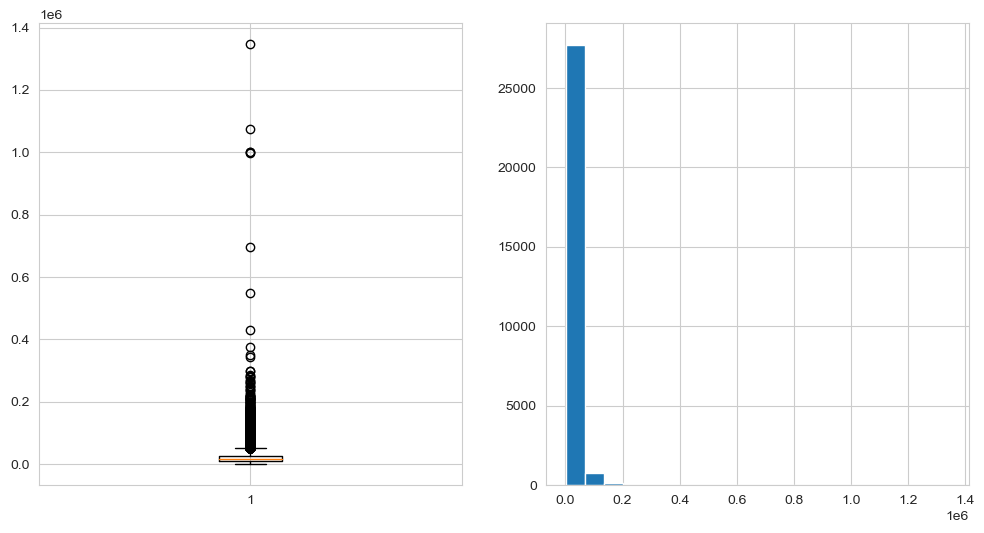

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.price)

plt.subplot(122)
plt.hist(df.price,bins=20);

In [26]:
outliers(df,"price") 

1910

In [27]:
winsorize_percentage_selection(df,"price")

90% quantile:    42980.0
92.5% quantile:  49657.575000000055
95% quantile:    57633.99999999994
97.5% quantile:  72960.99999999991
99% quantile:    109935.49999999996
99.9% quantile:  227524.6650000201


%97.5 Quantile has selected.

In [28]:
df.price= winsorize(df["price"],(0, 0.025),inplace=True)

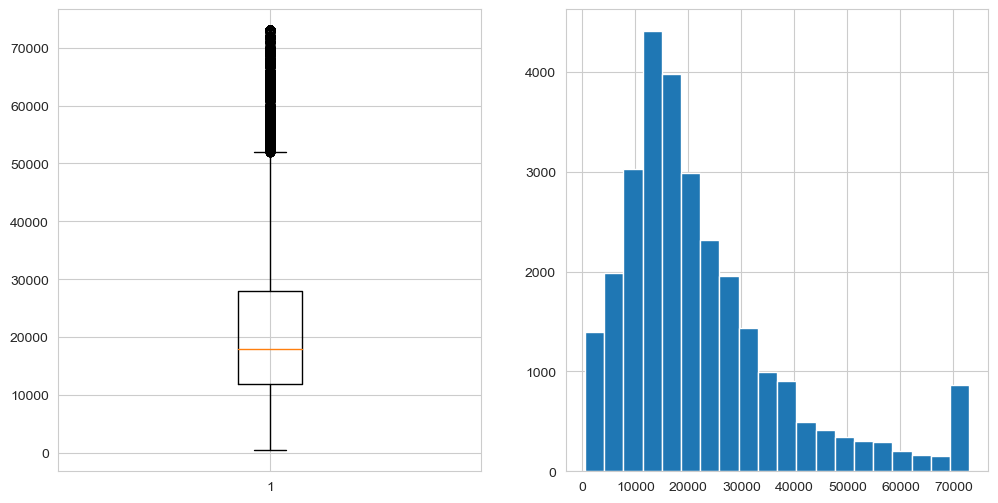

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.price)

plt.subplot(122)
plt.hist(df.price,bins=20);

In [30]:
df.price.describe()

count   28630.000
mean    22298.875
std     15682.691
min       490.000
25%     11990.000
50%     17980.000
75%     27990.000
max     72990.000
Name: price, dtype: float64

## mileage

In [31]:
df.mileage.describe()

count     28630.000
mean      72624.771
std       67628.347
min           0.000
25%       20290.000
50%       57491.500
75%      106667.500
max     1440000.000
Name: mileage, dtype: float64

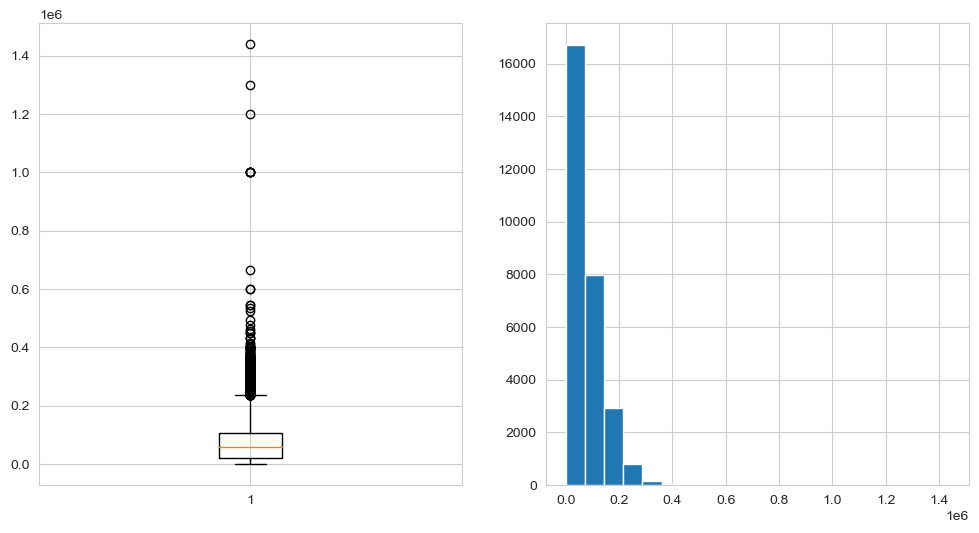

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.mileage)

plt.subplot(122)
plt.hist(df.mileage,bins=20);

In [34]:
limits(df,"mileage")

Lower Limit: -109276.25
Upper limit: 236233.75


In [35]:
outliers(df,"mileage")

671

In [36]:
winsorize_percentage_selection(df,"mileage")

90% quantile:    161000.0
92.5% quantile:  178000.0
95% quantile:    199101.65
97.5% quantile:  234000.0
99% quantile:    277034.13999999996
99.9% quantile:  400950.8280000047


Since it is possible for company vehicles or vehicles used for long journeys to reach 317 thousand km, the values that appear as outliers are not considered as outliers. Therefore, no action will be taken.

## gears

In [37]:
df.gears.describe()

count   28630.000
mean        6.014
std         0.886
min         5.000
25%         5.000
50%         6.000
75%         6.000
max         8.000
Name: gears, dtype: float64

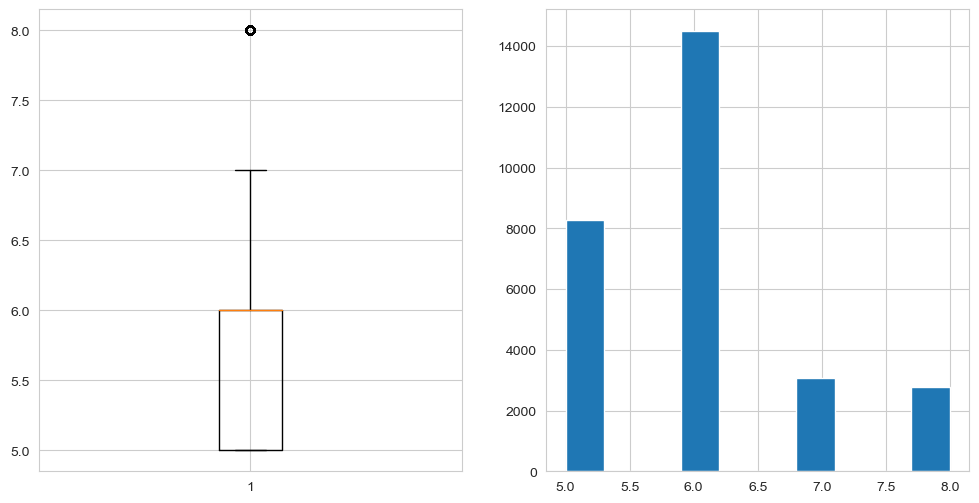

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.gears)

plt.subplot(122)
plt.hist(df.gears,bins=10);

In [39]:
limits(df,"gears")

Lower Limit: 3.5
Upper limit: 7.5


In [40]:
outliers(df,"gears")

2782

## power

In [42]:
df.power.describe()

count   28630.000
mean      119.605
std        68.520
min         1.000
25%        80.000
50%       100.000
75%       136.000
max       924.000
Name: power, dtype: float64

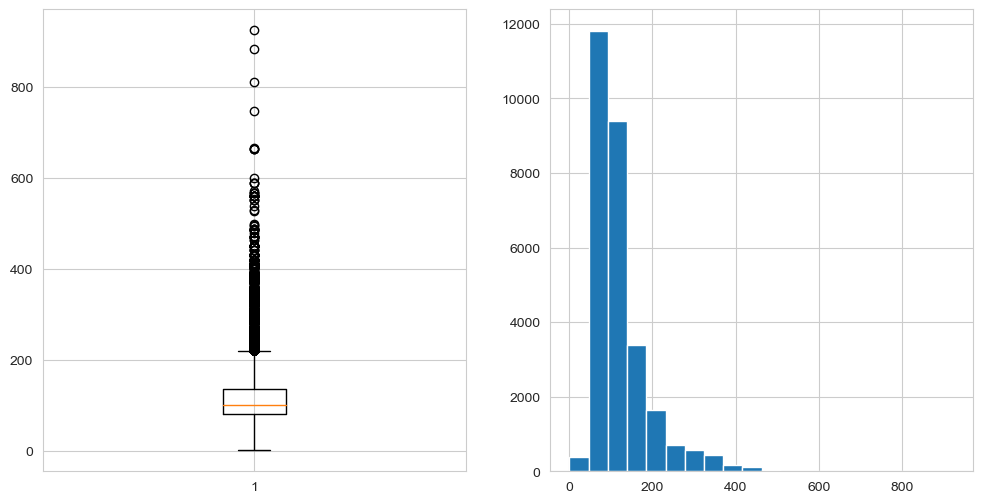

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.power)

plt.subplot(122)
plt.hist(df.power,bins=20);

In [44]:
limits(df,"power")

Lower Limit: -4.0
Upper limit: 220.0


In [45]:
outliers(df,"power")

2643

In [46]:
(df.power <50).sum()

491

In [47]:
df.power.loc[(df.power <50)] = 50

In [48]:
df.make_model.unique()

array(['Mercedes-Benz  A 160 ', 'Mercedes-Benz  EQE 350 ',
       'Mercedes-Benz  A 45 AMG ', 'Mercedes-Benz  A 35 AMG ',
       'Mercedes-Benz  C 160 ', 'Mercedes-Benz  CLA 180 ',
       'Mercedes-Benz  A 220 ', 'Mercedes-Benz  A 200 ',
       'Mercedes-Benz  A 250 ', 'Mercedes-Benz  A 180 ',
       'Mercedes-Benz  GLC 220 ', 'Mercedes-Benz  E 220 ',
       'Mercedes-Benz  B 200 ', 'Mercedes-Benz  A 150 ',
       'Mercedes-Benz  V 220 ', 'Mercedes-Benz  AMG GT ',
       'Mercedes-Benz  E 300 ', 'Mercedes-Benz  EQS ',
       'Mercedes-Benz  A 140 ', 'Mercedes-Benz   ', 'Mercedes-Benz  CL ',
       'Mercedes-Benz  B 180 ', 'Mercedes-Benz  GLB 200 ',
       'Mercedes-Benz  E 350 ', 'Mercedes-Benz  CLA 200 ',
       'Mercedes-Benz  280 ', 'Mercedes-Benz  GLA 180 ',
       'Mercedes-Benz  Viano ', 'Mercedes-Benz  E 53 AMG ',
       'Mercedes-Benz  SLK 200 ', 'Mercedes-Benz  GLE 350 ',
       'Mercedes-Benz  220 ', 'Mercedes-Benz  SL 500 ',
       'Mercedes-Benz  E 400 ', 'Mercedes-Benz  SL

In [49]:
(df.power >153).sum()

5074

In [50]:
winsorize_percentage_selection(df,"power")

90% quantile:    206.0
92.5% quantile:  228.0
95% quantile:    270.0
97.5% quantile:  331.0
99% quantile:    375.0
99.9% quantile:  532.5970000000198


%97.5 quantile 

In [51]:
df.power= winsorize(df["power"],(0, 0.025),inplace=True)

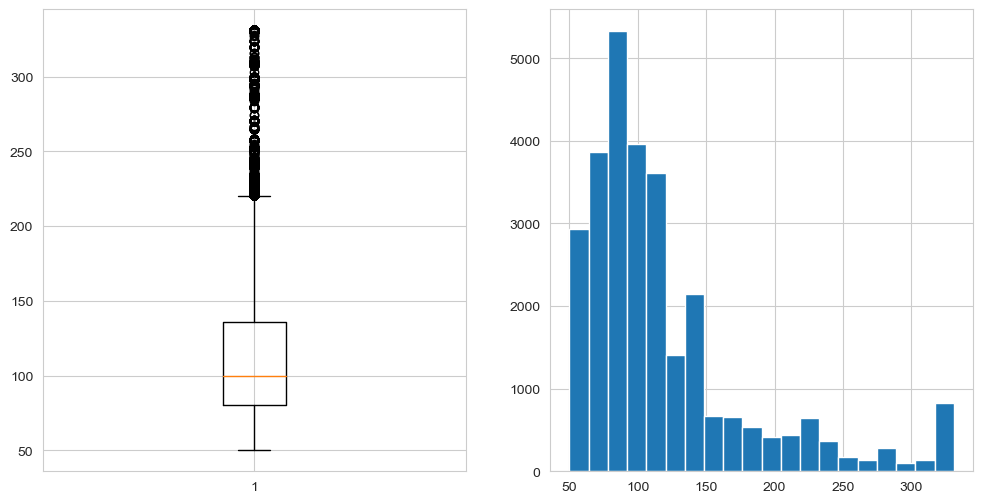

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.power)

plt.subplot(122)
plt.hist(df.power,bins=20);

## Age 

In [53]:
df.age.describe()

count   28630.000
mean        7.394
std         8.786
min      -180.000
25%         2.000
50%         5.000
75%         9.000
max       123.000
Name: age, dtype: float64

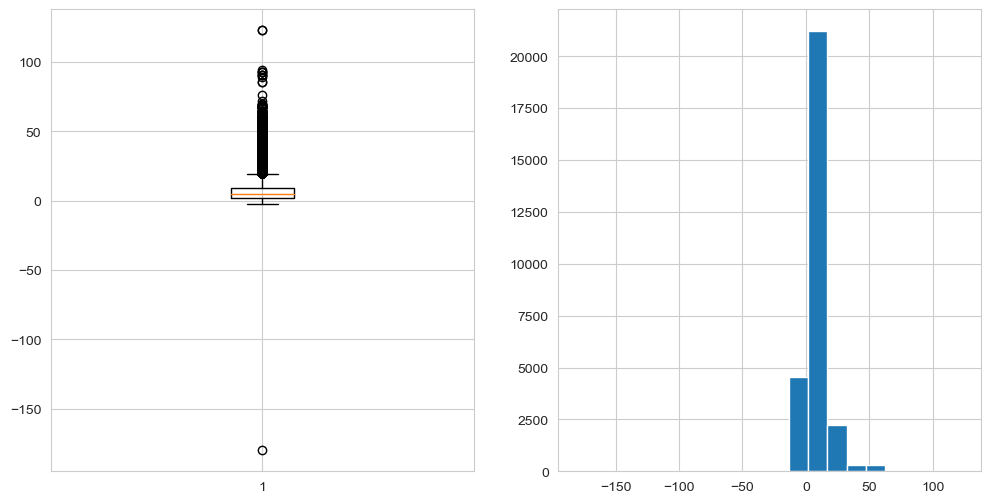

In [54]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.age)

plt.subplot(122)
plt.hist(df.age,bins=20);

In [55]:
limits(df,"age")

Lower Limit: -8.5
Upper limit: 19.5


In [56]:
outliers(df,"age")

2009

In [57]:
def remove_outliers(df,age):
    q1 = df["age"].quantile(0.25)
    q3 = df["age"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df["age"] >= lower_bound) & (df["age"] <= upper_bound)]
    return df


In [58]:
df = remove_outliers(df, "age")

In [59]:
outliers(df,"age")

1809

## doors 

In [60]:
df.doors.describe()

count   26621.000
mean        4.267
std         1.138
min         1.000
25%         4.000
50%         5.000
75%         5.000
max         6.000
Name: doors, dtype: float64

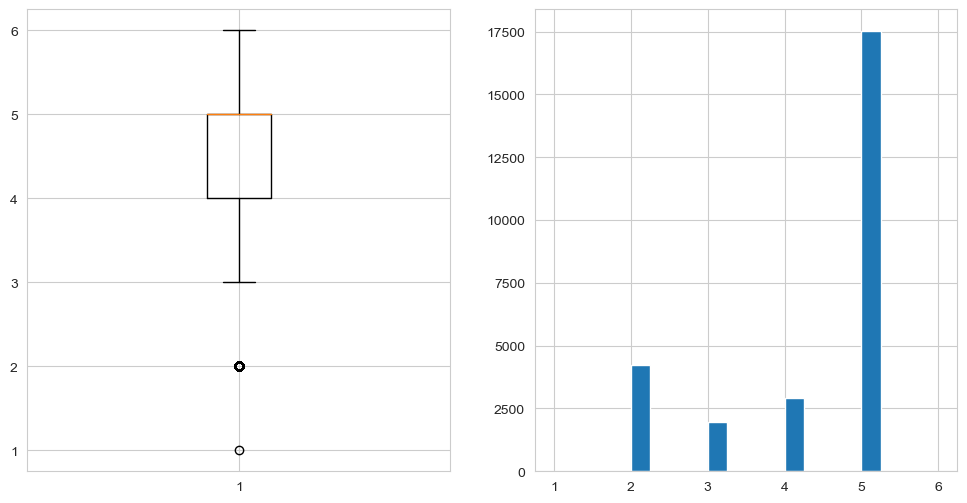

In [61]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.doors)

plt.subplot(122)
plt.hist(df.doors,bins=20);

In [62]:
limits(df,"doors")

Lower Limit: 2.5
Upper limit: 6.5


In [63]:
outliers(df,"doors")

4224

In [64]:
df.make_model.unique()

array(['Mercedes-Benz  A 160 ', 'Mercedes-Benz  EQE 350 ',
       'Mercedes-Benz  A 45 AMG ', 'Mercedes-Benz  A 35 AMG ',
       'Mercedes-Benz  C 160 ', 'Mercedes-Benz  CLA 180 ',
       'Mercedes-Benz  A 220 ', 'Mercedes-Benz  A 200 ',
       'Mercedes-Benz  A 250 ', 'Mercedes-Benz  A 180 ',
       'Mercedes-Benz  GLC 220 ', 'Mercedes-Benz  E 220 ',
       'Mercedes-Benz  B 200 ', 'Mercedes-Benz  A 150 ',
       'Mercedes-Benz  V 220 ', 'Mercedes-Benz  AMG GT ',
       'Mercedes-Benz  EQS ', 'Mercedes-Benz  A 140 ', 'Mercedes-Benz   ',
       'Mercedes-Benz  CL ', 'Mercedes-Benz  B 180 ',
       'Mercedes-Benz  GLB 200 ', 'Mercedes-Benz  E 350 ',
       'Mercedes-Benz  CLA 200 ', 'Mercedes-Benz  GLA 180 ',
       'Mercedes-Benz  Viano ', 'Mercedes-Benz  E 53 AMG ',
       'Mercedes-Benz  SLK 200 ', 'Mercedes-Benz  GLE 350 ',
       'Mercedes-Benz  220 ', 'Mercedes-Benz  E 400 ',
       'Mercedes-Benz  SLC 43 AMG ', 'Mercedes-Benz  SL 350 ',
       'Mercedes-Benz  SLC 250 ', 'Mercedes

In [65]:
(df.doors >5).sum()

5

In [66]:
(df.doors < 2.5).sum()

4224

In [67]:
(df.doors == 1).sum()

1

In [68]:
(df.doors == 0).sum()

0

In [69]:
df.doors.loc[(df.doors == 1)] = 2

In [70]:
df= df.loc[(df.doors >= 2.5) & (df.doors <=5)]

In [71]:
df.doors.describe()

count   22392.000
mean        4.695
std         0.622
min         3.000
25%         5.000
50%         5.000
75%         5.000
max         5.000
Name: doors, dtype: float64

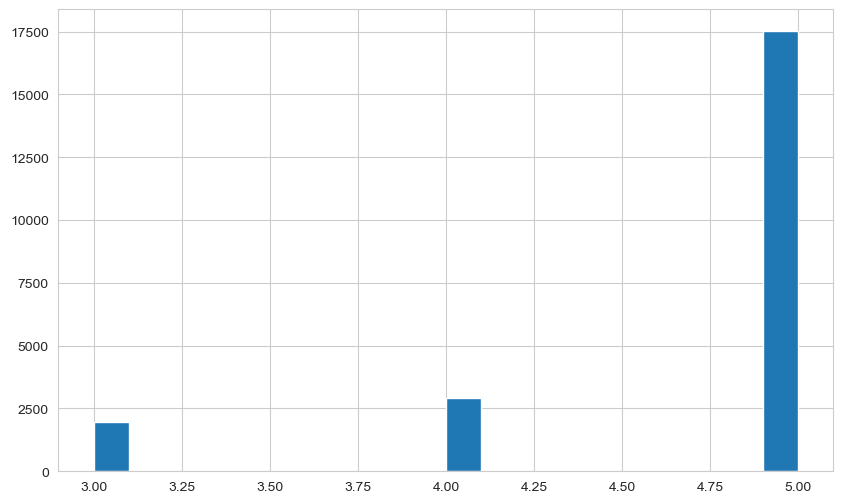

In [72]:
plt.hist(df.doors,bins=20);

## seats 

In [73]:
df.seats.describe()

count   22392.000
mean        4.957
std         0.559
min         0.000
25%         5.000
50%         5.000
75%         5.000
max        17.000
Name: seats, dtype: float64

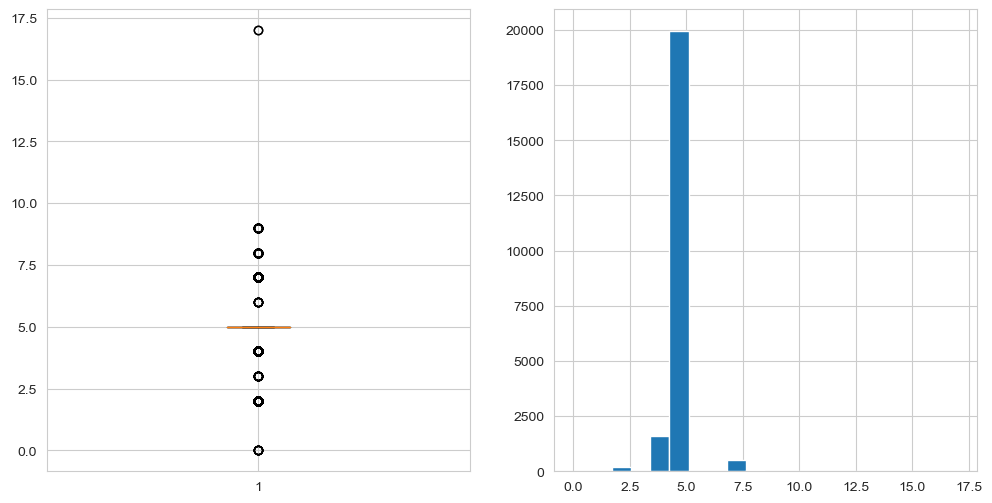

In [74]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.seats)

plt.subplot(122)
plt.hist(df.seats,bins=20);

In [75]:
limits(df,"seats")

Lower Limit: 5.0
Upper limit: 5.0


In [76]:
outliers(df,"seats")

2452

In [77]:
df.groupby("make_model")["body_type"].value_counts()

make_model                  body_type         
Dacia                        Compact                3
                             Station wagon          1
Dacia  Break                 Station wagon          1
Dacia  Dokker                Station wagon         51
                             Off-Road/Pick-up       2
                             Compact                1
                             Sedan                  1
Dacia  Duster                Off-Road/Pick-up     320
                             Station wagon         23
                             Sedan                  4
                             Convertible            1
Dacia  Jogger                Station wagon         84
                             Off-Road/Pick-up       1
                             Sedan                  1
Dacia  Lodgy                 Station wagon         69
                             Sedan                  2
                             Compact                1
Dacia  Logan                 Statio

## engine_size

In [84]:
df['engine_size'] = df['engine_size'].apply(lambda x: float(str(x).split()[0]))


In [85]:
df.engine_size.describe()

count   22392.000
mean     1598.758
std       898.577
min         0.000
25%      1199.000
50%      1499.000
75%      1969.000
max     99900.000
Name: engine_size, dtype: float64

In [86]:
df.engine_size.describe()

count   22392.000
mean     1598.758
std       898.577
min         0.000
25%      1199.000
50%      1499.000
75%      1969.000
max     99900.000
Name: engine_size, dtype: float64

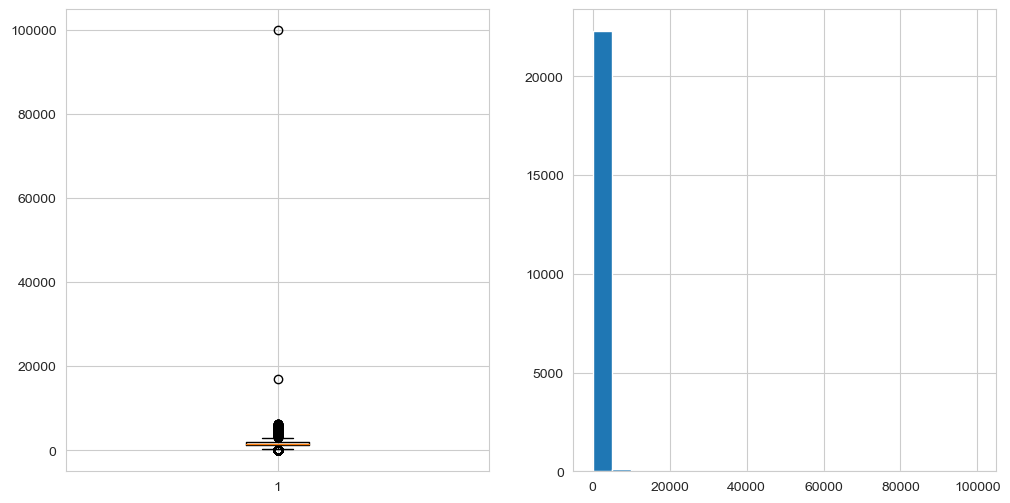

In [87]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.engine_size)

plt.subplot(122)
plt.hist(df.engine_size,bins=20);

In [88]:
limits(df,"engine_size")

Lower Limit: 44.0
Upper limit: 3124.0


In [89]:
outliers(df,"engine_size")

802

In [90]:
df.make_model.unique()

array(['Mercedes-Benz  A 160 ', 'Mercedes-Benz  EQE 350 ',
       'Mercedes-Benz  A 45 AMG ', 'Mercedes-Benz  A 35 AMG ',
       'Mercedes-Benz  C 160 ', 'Mercedes-Benz  CLA 180 ',
       'Mercedes-Benz  A 220 ', 'Mercedes-Benz  A 200 ',
       'Mercedes-Benz  A 250 ', 'Mercedes-Benz  A 180 ',
       'Mercedes-Benz  GLC 220 ', 'Mercedes-Benz  E 220 ',
       'Mercedes-Benz  B 200 ', 'Mercedes-Benz  A 150 ',
       'Mercedes-Benz  V 220 ', 'Mercedes-Benz  AMG GT ',
       'Mercedes-Benz  EQS ', 'Mercedes-Benz  A 140 ', 'Mercedes-Benz   ',
       'Mercedes-Benz  CL ', 'Mercedes-Benz  B 180 ',
       'Mercedes-Benz  GLB 200 ', 'Mercedes-Benz  E 350 ',
       'Mercedes-Benz  CLA 200 ', 'Mercedes-Benz  GLA 180 ',
       'Mercedes-Benz  Viano ', 'Mercedes-Benz  SLK 200 ',
       'Mercedes-Benz  GLE 350 ', 'Mercedes-Benz  220 ',
       'Mercedes-Benz  SLC 43 AMG ', 'Mercedes-Benz  SL 350 ',
       'Mercedes-Benz  SL 63 AMG ', 'Mercedes-Benz  C 180 ',
       'Mercedes-Benz  C 43 AMG ', 'Merced

<AxesSubplot:xlabel='make_model', ylabel='Displacement_cc'>

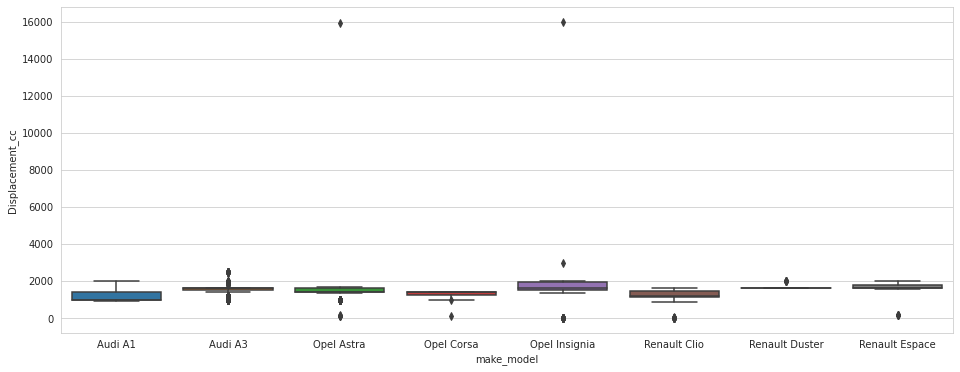

In [72]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="Displacement_cc", data=df)

In [91]:
(df.engine_size > 3000).sum()

448

In [92]:
(df.engine_size <1000).sum()

3954

In [93]:
df= df.loc[(df.engine_size >= 1000) & (df.engine_size <= 3000)]

In [94]:
df.engine_size.describe()

count   17990.000
mean     1683.340
std       378.040
min      1000.000
25%      1461.000
50%      1598.000
75%      1969.000
max      3000.000
Name: engine_size, dtype: float64

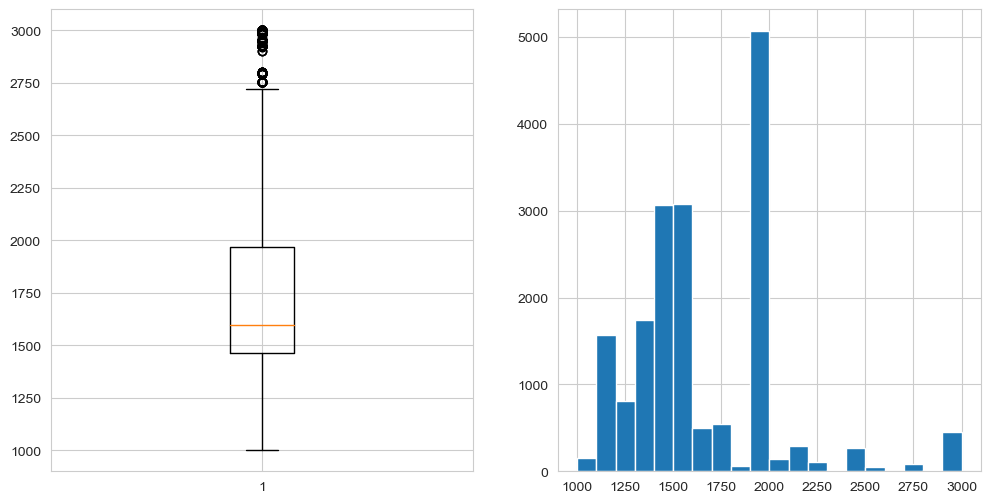

In [95]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.engine_size)

plt.subplot(122)
plt.hist(df.engine_size,bins=20);

# empty_weight	

In [96]:
df.empty_weight	.describe()

count       17990
unique       1058
top       1395 kg
freq          586
Name: empty_weight, dtype: object

In [102]:
df['empty_weight'] = df['empty_weight'].apply(lambda x: str(x).split()[0])
df['empty_weight'] = df['empty_weight'].str.replace(' kg','').astype(float)



In [103]:
limits(df, "empty_weight")

Lower Limit: 814.5
Upper limit: 2042.5


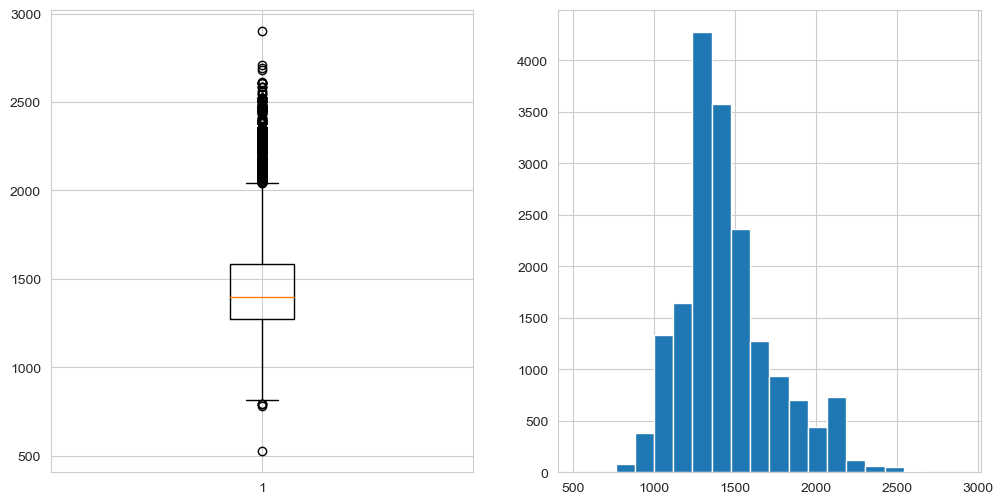

In [104]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.empty_weight)

plt.subplot(122)
plt.hist(df.empty_weight,bins=20);

In [105]:
(df.empty_weight < 1000).sum()

463

In [106]:
df =df.loc[(df.empty_weight >= 1000) & (df.empty_weight <= 3000)]

In [107]:
df.empty_weight.describe()

count   17527.000
mean     1466.148
std       283.228
min      1000.000
25%      1280.000
50%      1395.000
75%      1585.000
max      2900.000
Name: empty_weight, dtype: float64

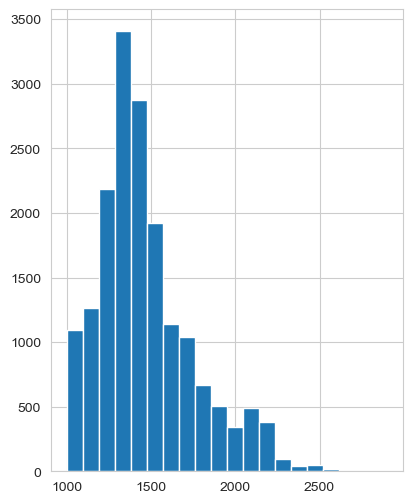

In [108]:
plt.subplot(122)
plt.hist(df.empty_weight,bins=20);

In [109]:
df.head(3).T

,0,2,3
short_description,CDi,S 4Matic+ 8G-DCT,4Matic+ 7G-DCT
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
model,A 160,A 45 AMG,A 35 AMG
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES"
price(€),16950,69900,46990
body_type,Compact,Compact,Compact
type,Used,Used,Used
doors,5.000,5.000,5.000
country_version,Spain,Spain,Spain
warranty,24 months,12 months,12 months


In [110]:
df.shape

(17527, 44)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17527 entries, 0 to 28628
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   short_description        17527 non-null  object 
 1   make                     17527 non-null  object 
 2   model                    17527 non-null  object 
 3   location                 17527 non-null  object 
 4   price(€)                 17527 non-null  int64  
 5   body_type                17527 non-null  object 
 6   type                     17527 non-null  object 
 7   doors                    17527 non-null  float64
 8   country_version          17527 non-null  object 
 9   warranty                 17527 non-null  object 
 10  mileage                  17527 non-null  float64
 11  first_registration       17527 non-null  object 
 12  gearbox                  17527 non-null  object 
 13  fuel_type                17527 non-null  object 
 14  colour                

In [112]:
df.isnull().sum()

short_description          0
make                       0
model                      0
location                   0
price(€)                   0
body_type                  0
type                       0
doors                      0
country_version            0
warranty                   0
mileage                    0
first_registration         0
gearbox                    0
fuel_type                  0
colour                     0
paint                      0
desc                       0
seller                     0
seats                      0
power                      0
engine_size                0
gears                      0
co₂-emissions              0
manufacturer_colour        0
drivetrain                 0
cylinders                  0
fuel_consumption           0
empty_weight               0
general_inspection         0
emission_class             0
emissions_sticker          0
upholstery_colour          0
upholstery                 0
production_date            0
energy_efficie

In [113]:
df.describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
price(€),17527.000,24072.537,16118.258,490.000,13892.500,19990.000,29950.000,188008.000
doors,17527.000,4.725,0.580,3.000,5.000,5.000,5.000,5.000
mileage,17527.000,68198.212,60585.001,0.000,21240.500,56325.000,98745.000,1199900.000
seats,17527.000,5.013,0.509,0.000,5.000,5.000,5.000,17.000
power,17527.000,116.917,50.848,50.000,85.000,103.000,135.000,331.000
engine_size,17527.000,1695.347,375.240,1000.000,1461.000,1598.000,1969.000,3000.000
gears,17527.000,6.273,0.909,5.000,6.000,6.000,7.000,8.000
cylinders,17527.000,3.994,0.438,0.000,4.000,4.000,4.000,26.000
fuel_consumption,17527.000,5.059,2.506,0.000,4.100,5.000,5.900,99.900
empty_weight,17527.000,1466.148,283.228,1000.000,1280.000,1395.000,1585.000,2900.000


In [116]:
numeric_columns = "price,mileage,gears,power,age,doors,seats,engine_size,empty_weight".split(",")

In [117]:
df_numeric= df[numeric_columns]

In [118]:
df_numeric.head(3).T

,0,2,3
price,16950.000,69900.000,46990.000
mileage,120200.000,18900.000,18995.000
gears,5.000,8.000,7.000
power,75.000,310.000,225.000
age,7.000,2.000,3.000
doors,5.000,5.000,5.000
seats,5.000,5.000,5.000
engine_size,1595.000,1991.000,1991.000
empty_weight,1270.000,1555.000,1455.000


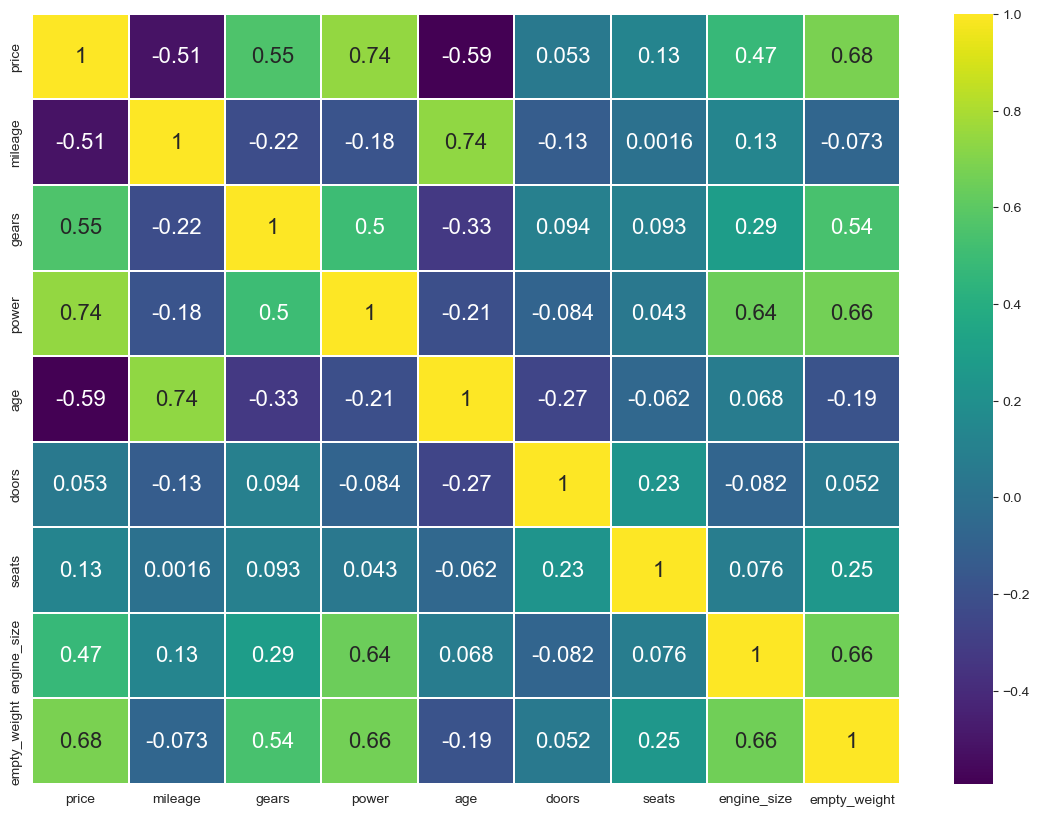

In [119]:
plt.figure(figsize = (14,10))
sns.heatmap(df_numeric.corr(), annot = True, cmap="viridis", linewidths=0.2, annot_kws = {"size": 16});

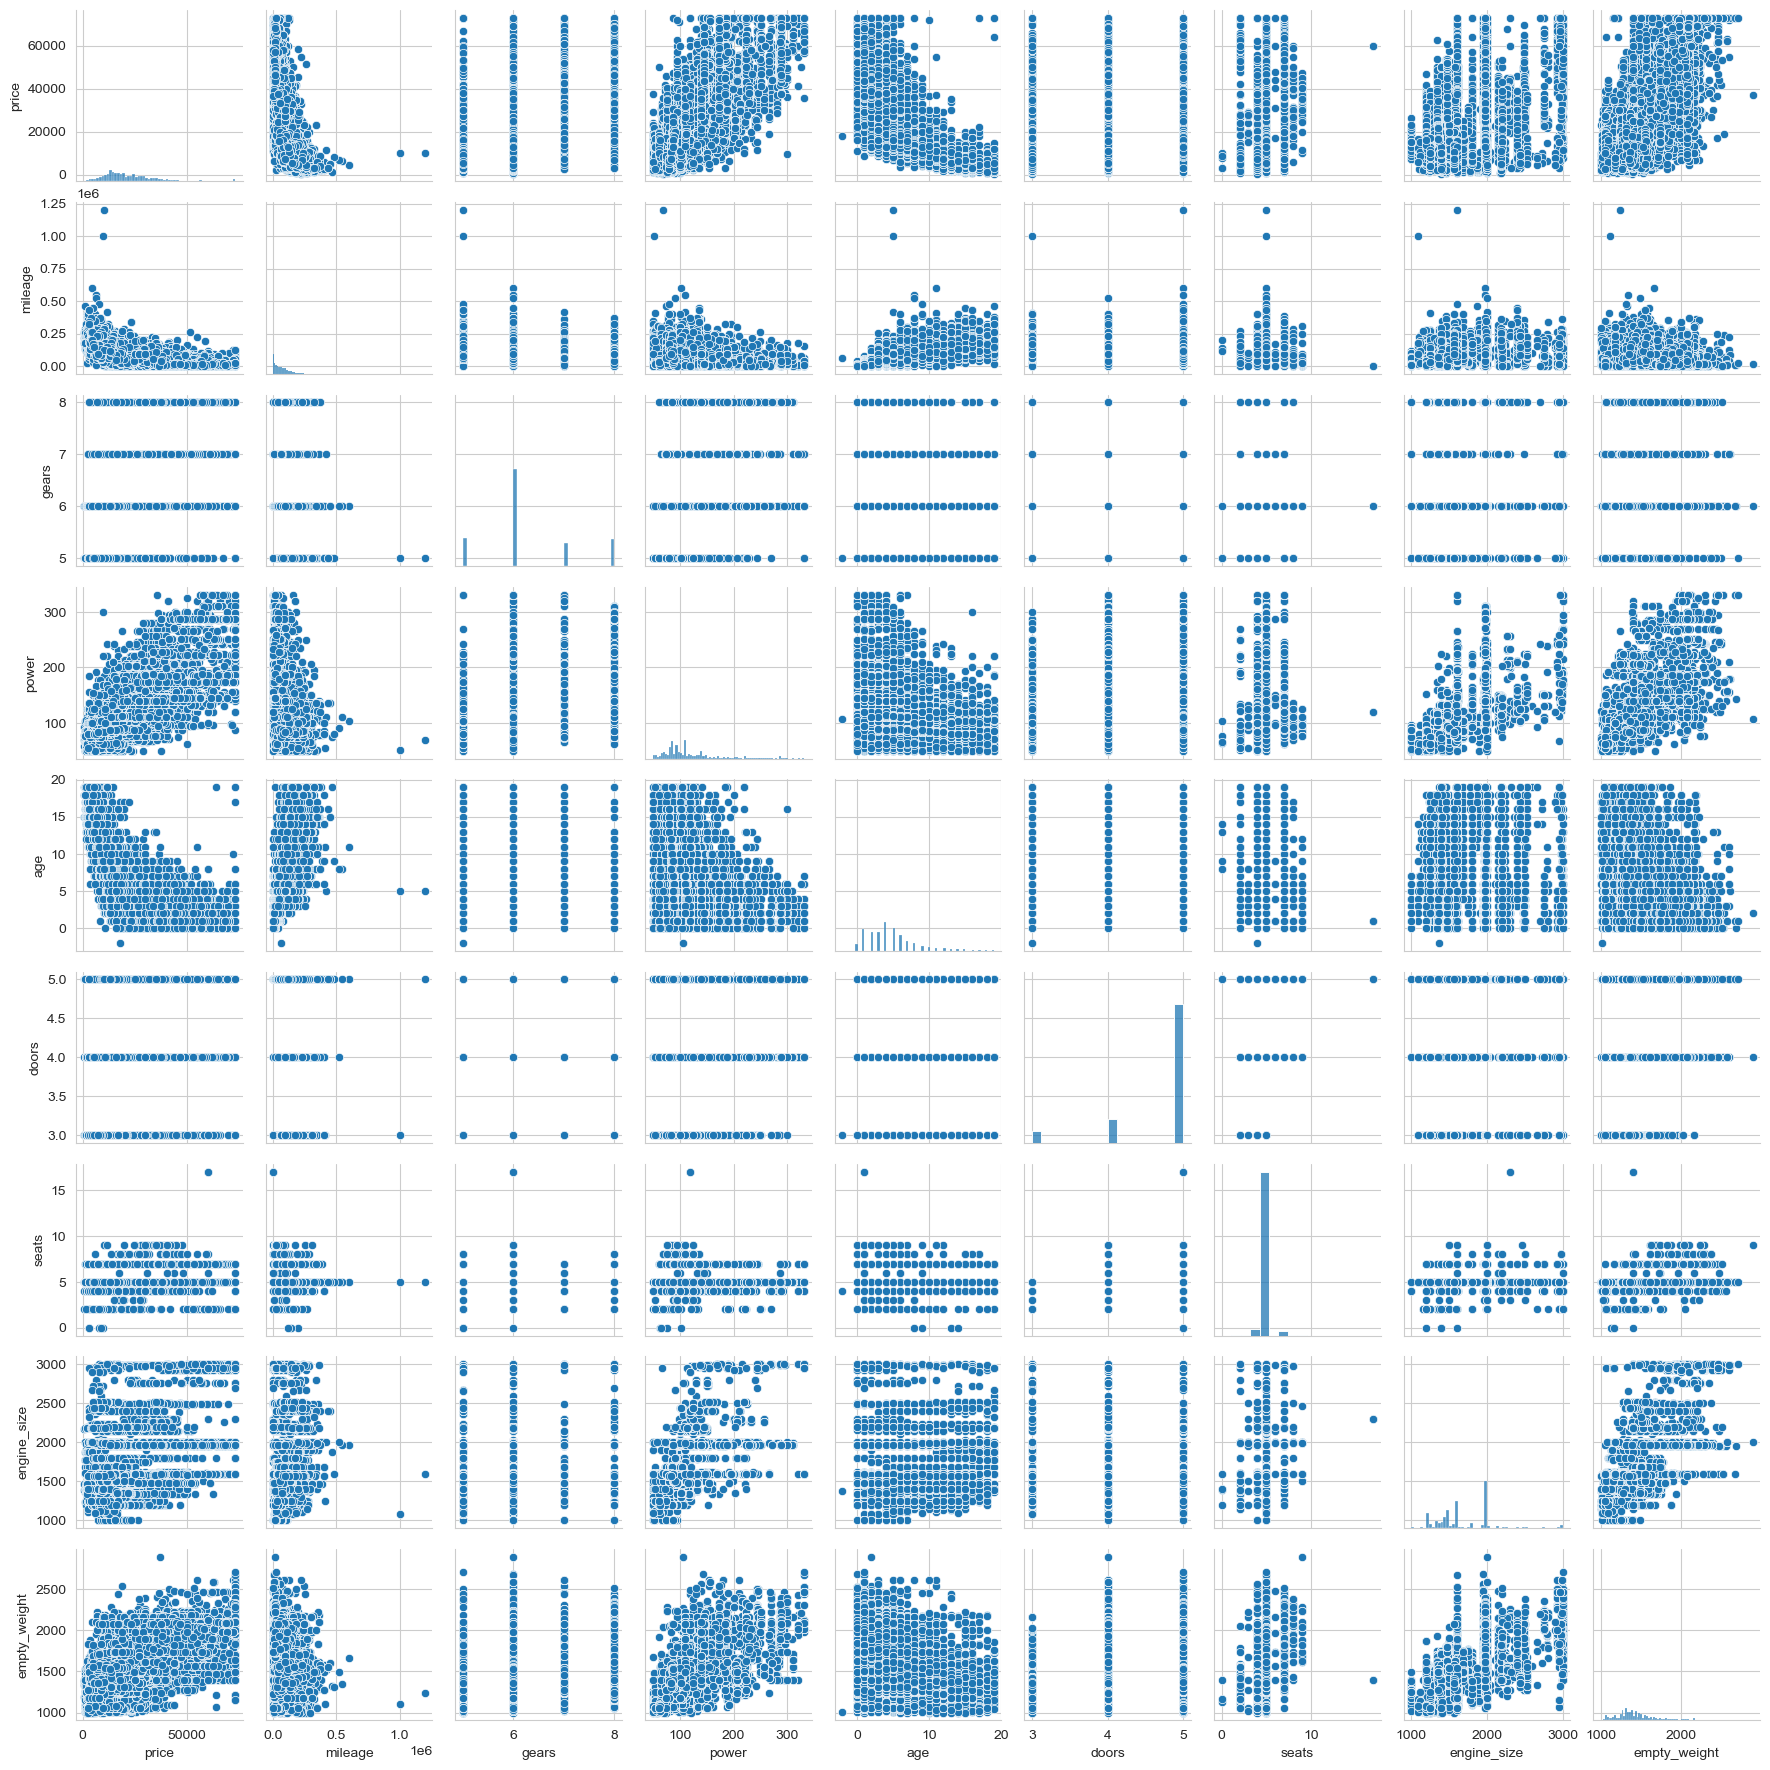

In [120]:
sns.pairplot(df_numeric, size=2);

In [121]:
df.to_csv("auto_scout_final_without_dummies.csv")

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17527 entries, 0 to 28628
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   short_description        17527 non-null  object 
 1   make                     17527 non-null  object 
 2   model                    17527 non-null  object 
 3   location                 17527 non-null  object 
 4   price(€)                 17527 non-null  int64  
 5   body_type                17527 non-null  object 
 6   type                     17527 non-null  object 
 7   doors                    17527 non-null  float64
 8   country_version          17527 non-null  object 
 9   warranty                 17527 non-null  object 
 10  mileage                  17527 non-null  float64
 11  first_registration       17527 non-null  object 
 12  gearbox                  17527 non-null  object 
 13  fuel_type                17527 non-null  object 
 14  colour                

In [123]:
df.shape

(17527, 44)

In [125]:
df = df.join(df["comfort_&_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["entertainment_&_media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["safety_&_security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [126]:
df.drop(["comfort_&_convenience","entertainment_&_media","extras","safety_&_security"], axis=1, inplace=True)

In [127]:
df.head(3).T

,0,2,3
short_description,CDi,S 4Matic+ 8G-DCT,4Matic+ 7G-DCT
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
model,A 160,A 45 AMG,A 35 AMG
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES"
price(€),16950,69900,46990
body_type,Compact,Compact,Compact
type,Used,Used,Used
doors,5.000,5.000,5.000
country_version,Spain,Spain,Spain
warranty,24 months,12 months,12 months


In [128]:
df_dummies= pd.get_dummies(df, drop_first=True)

In [129]:
df_dummies.shape

(17527, 36626)

In [130]:
df.to_csv("auto_scout_final_with_dummies.csv")